# S05 T01: Tarea métodos de muestreo
Descripción
Aprende a realizar muestreo de los datos con Python.
___
## Nivel 1
- Ejercicio 1:
Coge un conjunto de datos de tema deportivo que te guste. Realiza un muestreo de datos generando una muestra aleatoria simple y una muestra sistemática.

In [1]:
#import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
from matplotlib import pyplot
from imblearn.over_sampling import SMOTE

Seleccionamos un dataset de la NBA disponible en: https://www.kaggle.com/nathanlauga/nba-games?select=games_details.csv
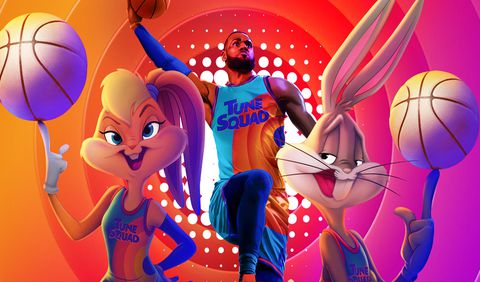

In [2]:
#import the dataset
nba_dataset = pd.read_csv('games_details.csv')
nba_dataset.head()

C:\Users\Usuario\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22100213,1610612764,WAS,Washington,203484,Kentavious Caldwell-Pope,Kentavious,F,NaN,27:41,...,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
1,22100213,1610612764,WAS,Washington,1628398,Kyle Kuzma,Kyle,F,NaN,30:28,...,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0
2,22100213,1610612764,WAS,Washington,1629655,Daniel Gafford,Daniel,C,NaN,24:21,...,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0
3,22100213,1610612764,WAS,Washington,203078,Bradley Beal,Bradley,G,NaN,35:07,...,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0
4,22100213,1610612764,WAS,Washington,203915,Spencer Dinwiddie,Spencer,G,NaN,28:34,...,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0


In [3]:
nba_dataset.info() #basic info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626111 entries, 0 to 626110
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            626111 non-null  int64  
 1   TEAM_ID            626111 non-null  int64  
 2   TEAM_ABBREVIATION  626111 non-null  object 
 3   TEAM_CITY          626111 non-null  object 
 4   PLAYER_ID          626111 non-null  int64  
 5   PLAYER_NAME        626111 non-null  object 
 6   NICKNAME           10485 non-null   object 
 7   START_POSITION     239375 non-null  object 
 8   COMMENT            102359 non-null  object 
 9   MIN                523751 non-null  object 
 10  FGM                523751 non-null  float64
 11  FGA                523751 non-null  float64
 12  FG_PCT             523751 non-null  float64
 13  FG3M               523751 non-null  float64
 14  FG3A               523751 non-null  float64
 15  FG3_PCT            523751 non-null  float64
 16  FT

Descripcion de las estidisticas de la NBA y su significado: 
- MIN: El número de minutos jugados por un jugador o equipo
- FGM: El número de tiros de campo que ha hecho un jugador o equipo (Fiel goals made)
- FGA: El número de tiros de campo que ha intentado un jugador o equipo (Field goals attempted)   
- FG_PCT: El porcentaje de intentos de gol de campo que hace un jugador (Field goal percentage)
- FG3M: El número de tiros de campo de 3 puntos que un jugador o equipo ha hecho (3 Point Field Goals Made)
- FG3A: El número de tiros de campo de 3 puntos que un jugador o equipo ha intentado (3 Point Field Goals Attempted)
- FG3_PCT:El porcentaje de tiros que un jugador ha hecho mientras estaba en la cancha (Percentage of Team's 3 Point Field Goals Made)
- FTM: El número de tiros libres que ha hecho un jugador o equipo (Free Throws Made)
- FTA: El número de tiros libres que un jugador o equipo ha intentado (Free Throw Attempt Rate)
- FT_PCT: El porcentaje de intentos de tiros libres que ha realizado un jugador o equipo (Free Throw Percentage)
- OREB: Numero de rebotes ofensivos que recupera un jugador o equipo en comparación con el número de oportunidades de rebote ofensivo (Offensive Rebound Chance Percentage)
- DREB: Número de rebotes que un jugador o equipo ha recogido mientras estaba en defensa  (Defensive Rebounds)
- REB: Un rebote se produce cuando un jugador recupera el balón tras un tiro fallado. Esta estadística es el número total de rebotes que un jugador o equipo ha recogido en ataque o defensa (Rebounds)
- AST: El número de asistencias, pases que conducen directamente a una canasta hecha, por un jugador (Assists)
- STL: Número de veces que un jugador o equipo defensivo le quita el balón a un jugador en ataque, provocando una pérdida de balón (Steals)
- BLK: Un bloqueo ocurre cuando un jugador ofensivo intenta un tiro y el jugador defensivo inclina la pelota, bloqueando su oportunidad de anotar. (Blocks)
- TO: Un cambio de posesión ocurre cuando el jugador o el equipo en ataque pierde el balón ante la defensa (Turnover)
- PF: El número de faltas personales que cometió un jugador o equipo (Personal Fouls)
- PTS: Número de puntos anotados (puntos)
- PLUS_MINUS: La diferencia de puntos cuando un jugador o equipo está en la cancha

Hacemos una limpieza de los datos del dataset

In [6]:
#we fill the 'null' is to 0 
nba_dataset.update(nba_dataset[['PTS','FGM','FGA','FG_PCT','FG3M','FG3A','FG3_PCT','FTM', 'FTA', 'FT_PCT','OREB','DREB','REB','AST','STL','BLK','TO','PF','PLUS_MINUS']].fillna(0))

In [7]:
nba_dataset.isnull().sum() #search for null values

GAME_ID                   0
TEAM_ID                   0
TEAM_ABBREVIATION         0
TEAM_CITY                 0
PLAYER_ID                 0
PLAYER_NAME               0
NICKNAME             615626
START_POSITION       386736
COMMENT              523752
MIN                  102360
FGM                       0
FGA                       0
FG_PCT                    0
FG3M                      0
FG3A                      0
FG3_PCT                   0
FTM                       0
FTA                       0
FT_PCT                    0
OREB                      0
DREB                      0
REB                       0
AST                       0
STL                       0
BLK                       0
TO                        0
PF                        0
PTS                       0
PLUS_MINUS                0
dtype: int64

In [8]:
#we drop this columns because they have mostly NaN values and nickname is not required since we have the full name of player
nba_dataset.drop(columns=['COMMENT', 'NICKNAME'], inplace=True)

In [9]:
nba_dataset.describe().round(2)

,GAME_ID,TEAM_ID,PLAYER_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
count,626111.00,6.261110e+05,6.261110e+05,626111.00,626111.00,626111.00,626111.00,626111.00,626111.00,626111.00,...,626111.00,626111.00,626111.00,626111.00,626111.00,626111.00,626111.00,626111.00,626111.00,626111.00
mean,21645530.61,1.610613e+09,3.451868e+05,2.99,6.59,0.35,0.63,1.77,0.17,1.45,...,0.86,2.53,3.39,1.75,0.60,0.39,1.11,1.68,8.06,-0.00
std,5656109.87,8.650000e+00,7.461713e+06,3.06,5.94,0.28,1.14,2.44,0.27,2.25,...,1.34,2.70,3.52,2.39,0.93,0.81,1.37,1.56,8.17,9.48
min,10300001.00,1.610613e+09,1.500000e+01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-57.00
25%,20600922.00,1.610613e+09,2.419000e+03,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-5.00
50%,21200224.00,1.610613e+09,2.011440e+05,2.00,6.00,0.38,0.00,1.00,0.00,0.00,...,0.00,2.00,3.00,1.00,0.00,0.00,1.00,1.00,6.00,0.00
75%,21700202.00,1.610613e+09,2.030920e+05,5.00,10.00,0.52,1.00,3.00,0.33,2.00,...,1.00,4.00,5.00,3.00,1.00,1.00,2.00,3.00,13.00,4.00
max,52000211.00,1.610613e+09,1.962938e+09,28.00,50.00,1.00,14.00,24.00,1.00,26.00,...,18.00,25.00,31.00,25.00,10.00,12.00,12.00,15.00,81.00,57.00


In [10]:
population_points_mean = round(nba_dataset['PTS'].mean(),2)
print('De la poblacion total de jugadores se puede observar que la media de puntos anotados es de:', population_points_mean)

De la poblacion total de jugadores se puede observar que la media de puntos anotados es de: 8.06


### Simple random sampling
Es una tecnica de muestreo que selecciona individuos al azar, donde todos los participantes tienen las mismas probabilidades de ser seleccionados. 
 <br>
 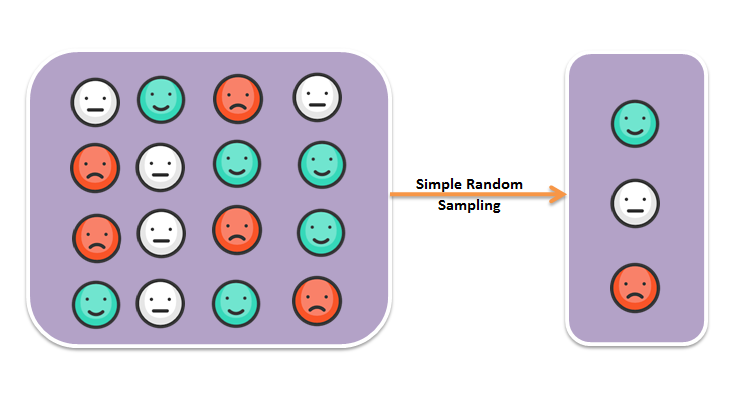
 <br>
Para realizar un muestreo random simple, primero debemos establecer el tamaño de la muestra que vamos a analizar, para lo cual debemos calcular que tamaño deberia tener de acuerdo a los datos que tenemos, el margen de error permitido y la desviacion estandard. 
 <br>
 Si partimos de la base de que no hemos analizado los datos de la poblacion y tenemos poco conocimiento de ella, podemos utilizar la formula Slovin para calcular el tamaño de la muestra:

### ***n = N / (1+Ne^2)***
donde:
- n = es el tamaño de la muestra
- N = es la poblacion total
- e = es la tolerancia del error (para este usaremos una tolerancia del 5%)

*fuente: (https://www.statisticshowto.com/probability-and-statistics/how-to-use-slovins-formula/).

In [11]:
dataset_size= nba_dataset['PLAYER_ID'].size + 1
dataset_size #data quantity or population

626112

In [12]:
#cwe create a function to calculate the sample size
def sample_size(N, e):
    n=N/(1+N*e**2)
    return round(n)

In [13]:
#Call of the sample function
size = sample_size(dataset_size,0.05) 
print('la muestra requerida para el conjunto de datos es:',size)

la muestra requerida para el conjunto de datos es: 400


In [14]:
#Simple Random Sampling
srs_sampling = nba_dataset.sample(size)
srs_sampling

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,MIN,FGM,FGA,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
104013,20701089,1610612746,LAC,Los Angeles,2694,Josh Powell,NaN,23:37,2.0,3.0,...,4.0,5.0,9.0,2.0,0.0,1.0,0.0,3.0,4.0,13.0
410517,21701154,1610612757,POR,Portland,1628380,Zach Collins,NaN,18:58,2.0,8.0,...,1.0,2.0,3.0,1.0,0.0,1.0,1.0,1.0,7.0,-20.0
598830,21200968,1610612757,POR,Portland,201964,Victor Claver,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
487083,21501009,1610612745,HOU,Houston,201147,Corey Brewer,NaN,21:53,2.0,6.0,...,0.0,4.0,4.0,2.0,0.0,0.0,2.0,4.0,6.0,-2.0
182673,20500647,1610612752,NYK,New York,990,Malik Rose,F,20:11,2.0,3.0,...,1.0,1.0,2.0,3.0,2.0,0.0,1.0,4.0,8.0,-13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505527,21500281,1610612757,POR,Portland,203468,CJ McCollum,G,32:54,7.0,20.0,...,1.0,4.0,5.0,5.0,2.0,0.0,2.0,2.0,21.0,7.0
99371,40700213,1610612753,ORL,Orlando,1740,Rashard Lewis,F,42:42,11.0,15.0,...,2.0,4.0,6.0,5.0,2.0,0.0,1.0,1.0,33.0,22.0
202032,40400201,1610612764,WAS,Washington,1712,Antawn Jamison,F,30:58,6.0,11.0,...,2.0,6.0,8.0,0.0,1.0,0.0,2.0,1.0,13.0,-9.0
106963,20700963,1610612764,WAS,Washington,101154,Andray Blatche,NaN,11:40,1.0,2.0,...,1.0,3.0,4.0,1.0,1.0,1.0,1.0,5.0,3.0,-1.0


In [15]:
srs_sampling.describe().round(2)

,GAME_ID,TEAM_ID,PLAYER_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
count,400.00,4.000000e+02,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,...,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,21484040.64,1.610613e+09,297332.85,2.93,6.42,0.34,0.62,1.83,0.15,1.49,...,0.77,2.54,3.30,1.62,0.57,0.35,1.10,1.58,7.96,-0.46
std,5566915.98,8.630000e+00,511657.17,3.22,6.08,0.29,1.14,2.59,0.26,2.36,...,1.16,2.76,3.49,2.22,0.89,0.71,1.46,1.50,8.64,9.54
min,10300018.00,1.610613e+09,15.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-33.00
25%,20601190.50,1.610613e+09,2443.50,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-6.25
50%,21200291.00,1.610613e+09,200796.00,2.00,5.00,0.33,0.00,0.00,0.00,0.00,...,0.00,2.00,2.00,1.00,0.00,0.00,1.00,1.00,5.00,0.00
75%,21700165.75,1.610613e+09,203078.25,5.00,10.00,0.50,1.00,3.00,0.25,2.00,...,1.00,4.00,5.00,2.00,1.00,0.00,2.00,3.00,13.00,5.00
max,41900314.00,1.610613e+09,1630179.00,14.00,31.00,1.00,7.00,13.00,1.00,14.00,...,6.00,16.00,19.00,12.00,6.00,4.00,8.00,6.00,40.00,33.00


In [16]:
srs_sampling.PLAYER_NAME.unique().size

338

In [17]:
srs_points_mean = round(srs_sampling['PTS'].mean(),2)
print('De la muestra de jugadores seleccionada se puede observar que la media de puntos anotados es de:', srs_points_mean)

De la muestra de jugadores seleccionada se puede observar que la media de puntos anotados es de: 7.96


In [18]:
srs_sampling.sort_values(by='PTS',ascending=False).head(5)[['PLAYER_NAME','TEAM_ABBREVIATION','PTS']]

,PLAYER_NAME,TEAM_ABBREVIATION,PTS
28352,Joel Embiid,PHI,40.0
78640,Kobe Bryant,LAL,36.0
54532,Donovan Mitchell,UTA,36.0
247568,Vince Carter,TOR,33.0
99371,Rashard Lewis,ORL,33.0


In [19]:
nba_dataset.sort_values(by='PTS',ascending=False).head(5)[['PLAYER_NAME','TEAM_ABBREVIATION','PTS']]

,PLAYER_NAME,TEAM_ABBREVIATION,PTS
184197,Kobe Bryant,LAL,81.0
448172,Devin Booker,PHX,70.0
140441,Kobe Bryant,LAL,65.0
570836,Carmelo Anthony,NYK,62.0
39851,Stephen Curry,GSW,62.0


Al comparar los puntos realizados por los jugadores entre la muestra de la poblacion y la poblacion original se puede ver que en la muestra los valores maximos no fueron incluidos. Por lo que ahora podemos analizar el rango de error de la muestra:

In [94]:
# Comparison of means between population and simple random sample
print (f'Symple random sampling Mean is: {srs_points_mean}\n Initial population mean is: {population_points_mean}\n')

# Relative Error
relative_error_mean_srs = round((abs((srs_points_mean-population_points_mean))/population_points_mean)*100, 3)
print(f'Relative error of the averages is: {relative_error_mean_srs}%')

Symple random sampling Mean is: 7.96
 Initial population mean is: 8.06

Relative error of the averages is: 1.241%


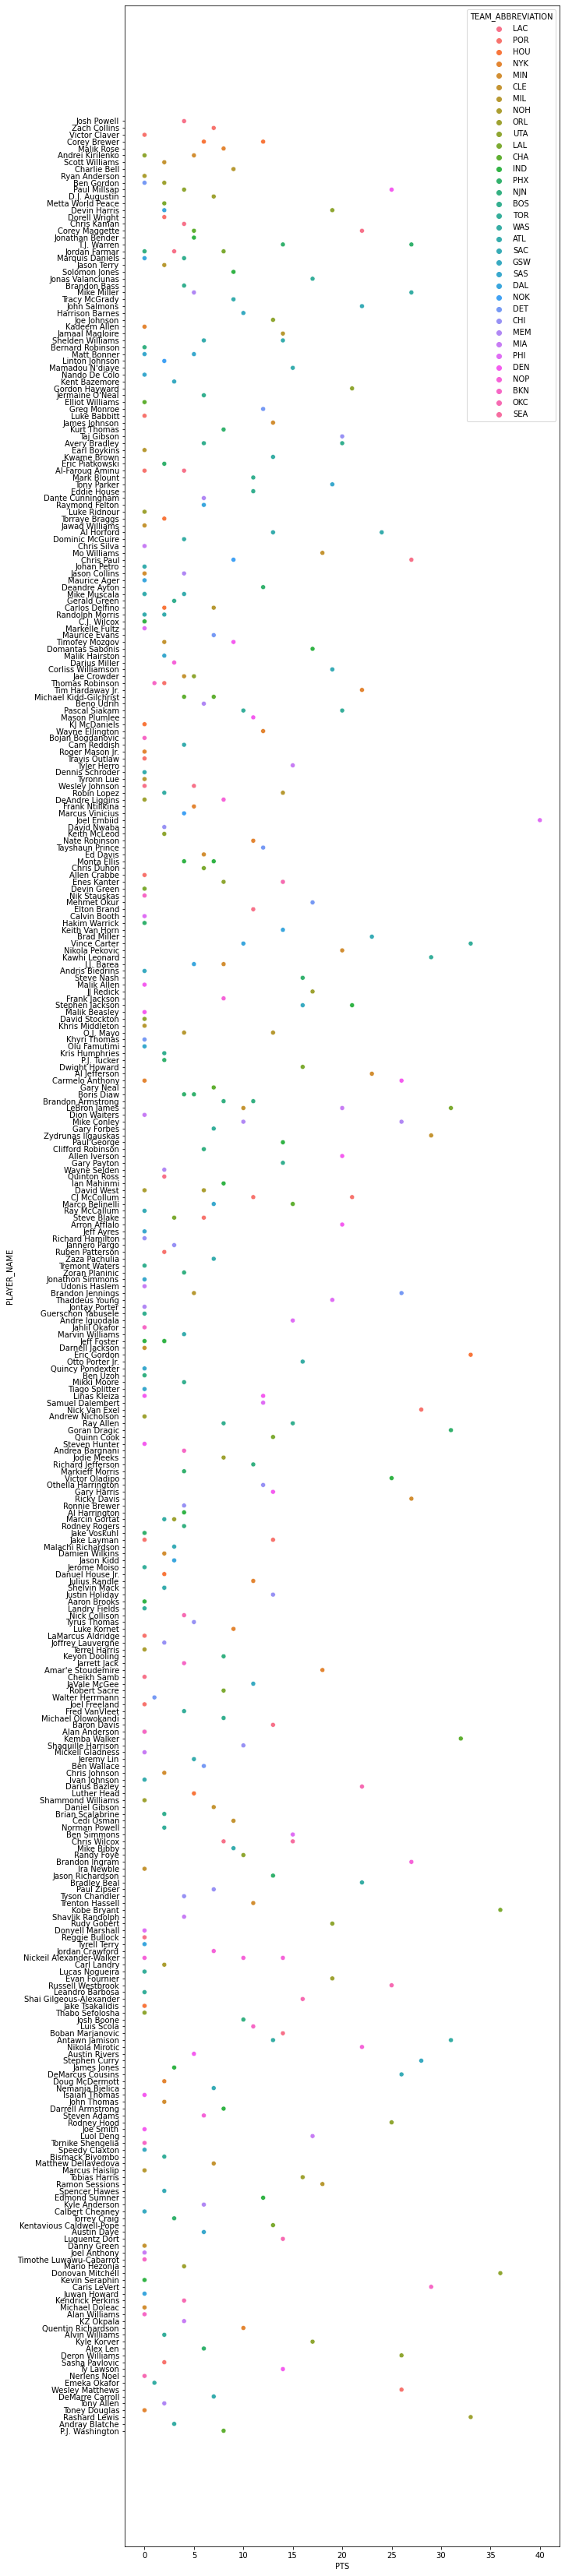

In [21]:
fig, ax1 = plt.subplots(figsize=(10,60))
srs_plot= sns.scatterplot(x='PTS', y='PLAYER_NAME',data=srs_sampling,hue='TEAM_ABBREVIATION')

### Muestra sistematica (Systematic sampling)
La tecnica de muestreo sistematica parte de la seleccion aleatoria de un punto de inicio a partir del cual se seleccionan datos en intervalos.
<br>
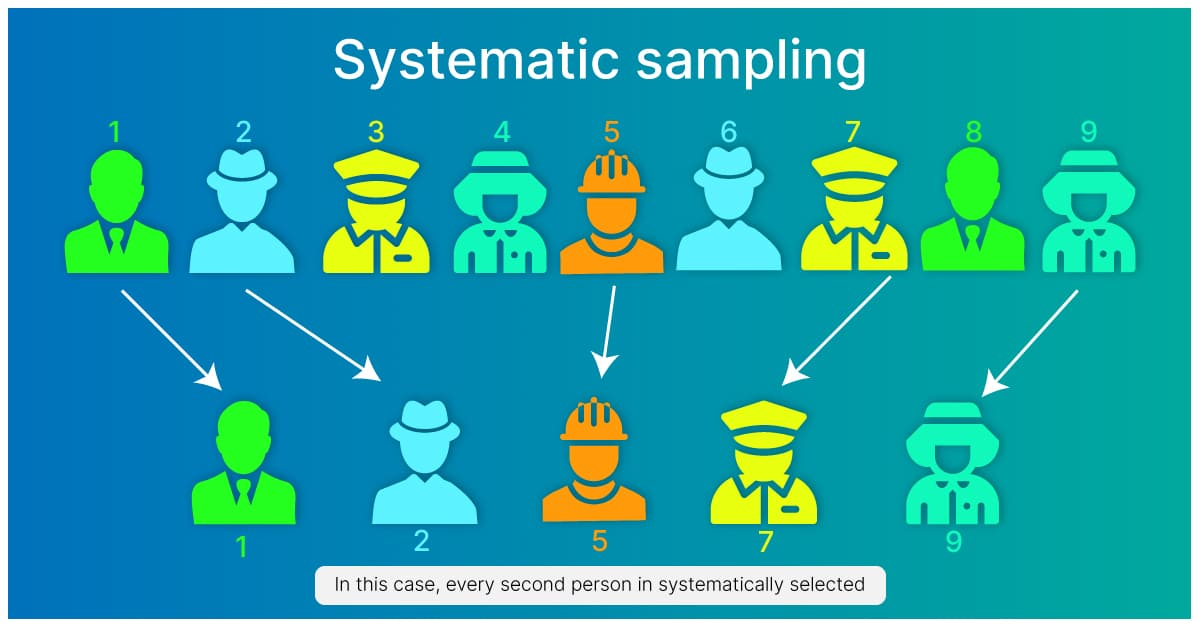

In [22]:
#reuse the sample size from previous sampling method
#define a method that generates the sampling:
def sys_sampling (df, step):
    indexes = np.arange(0,len(df), step=step)
    sys_sample= df.iloc[indexes]
    return sys_sample

Para definir el punto inicial y el intervalo para el systematic sampling utilizamos la siguiente formula: 
<br>
<br>
***Systematic Sampling Formula for interval (i) = N/n***
<br>
<br> donde:
- n = es el tamaño de la muestra
- N = es la poblacion total

In [23]:
step = round(dataset_size / size)
step

1565

In [24]:
#call function to generate sample
sys_sample_nba = sys_sampling(nba_dataset,step)
sys_sample_nba

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,MIN,FGM,FGA,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22100213,1610612764,WAS,Washington,203484,Kentavious Caldwell-Pope,F,27:41,1.0,6.0,...,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
1565,22100165,1610612760,OKC,Oklahoma City,1630581,Josh Giddey,G,30:43,3.0,10.0,...,5.0,7.0,12.0,9.0,1.0,0.0,5.0,3.0,7.0,3.0
3130,22100106,1610612756,PHX,Phoenix,203109,Jae Crowder,F,32:18,5.0,7.0,...,0.0,8.0,8.0,5.0,1.0,0.0,1.0,1.0,13.0,6.0
4695,22100045,1610612753,ORL,Orlando,1630175,Cole Anthony,G,31:58,5.0,13.0,...,0.0,9.0,9.0,5.0,2.0,0.0,3.0,0.0,12.0,-5.0
6260,12100055,1610612737,ATL,Atlanta,1628381,John Collins,F,28:43,5.0,11.0,...,4.0,7.0,11.0,1.0,2.0,1.0,1.0,0.0,13.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619740,21200139,1610612754,IND,Indiana,201571,D.J. Augustin,NaN,6:20,1.0,3.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,-1.0
621305,21200087,1610612762,UTA,Utah,101107,Marvin Williams,F,37:35,5.0,10.0,...,0.0,7.0,7.0,2.0,0.0,1.0,1.0,2.0,13.0,25.0
622870,21200025,1610612746,LAC,Los Angeles,2440,Matt Barnes,NaN,28:17,4.0,9.0,...,2.0,3.0,5.0,1.0,1.0,0.0,0.0,1.0,8.0,8.0
624435,11200082,1610612759,SAS,San Antonio,201971,DeJuan Blair,NaN,8,1.0,1.0,...,1.0,1.0,2.0,1.0,0.0,0.0,0.0,3.0,2.0,0.0


In [25]:
sys_sample_nba.describe()

,GAME_ID,TEAM_ID,PLAYER_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
count,4.010000e+02,4.010000e+02,4.010000e+02,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,...,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000
mean,2.177733e+07,1.610613e+09,3.151675e+05,2.827930,6.147132,0.343788,0.640898,1.710723,0.173638,1.356608,...,0.778055,2.421446,3.199501,1.755611,0.600998,0.394015,1.124688,1.605985,7.653367,0.571072
std,5.858275e+06,8.652497e+00,5.372401e+05,3.049232,5.834449,0.278006,1.129479,2.393974,0.279678,2.127208,...,1.203377,2.679447,3.435127,2.382252,0.946255,0.824235,1.412237,1.521303,8.078183,10.142759
min,1.040008e+07,1.610613e+09,1.090000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-32.000000
25%,2.060096e+07,1.610613e+09,2.399000e+03,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000
50%,2.120027e+07,1.610613e+09,2.007970e+05,2.000000,5.000000,0.375000,0.000000,1.000000,0.000000,0.000000,...,0.000000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,5.000000,0.000000
75%,2.170030e+07,1.610613e+09,2.031030e+05,4.000000,10.000000,0.500000,1.000000,3.000000,0.333000,2.000000,...,1.000000,4.000000,5.000000,3.000000,1.000000,0.000000,2.000000,3.000000,12.000000,4.000000
max,4.200020e+07,1.610613e+09,1.630581e+06,16.000000,27.000000,1.000000,6.000000,12.000000,1.000000,13.000000,...,7.000000,14.000000,18.000000,14.000000,6.000000,4.000000,8.000000,6.000000,40.000000,30.000000


In [95]:
sys_points_mean = round(sys_sample_nba['PTS'].mean(),2)
print('De la muestra de jugadores seleccionada se puede observar que la media de puntos anotados es de:', sys_points_mean)

De la muestra de jugadores seleccionada se puede observar que la media de puntos anotados es de: 7.65


In [27]:
sys_sample_nba.sort_values(by='PTS',ascending=False).head(5)[['PLAYER_NAME','TEAM_ABBREVIATION','PTS']]

,PLAYER_NAME,TEAM_ABBREVIATION,PTS
328650,LeBron James,CLE,40.0
173715,LeBron James,CLE,36.0
374035,Karl-Anthony Towns,MIN,35.0
416290,Damian Lillard,POR,35.0
541490,James Harden,HOU,34.0


In [96]:
# Comparison of means between population and simple random sample
print (f'Systematic sampling Mean is: {sys_points_mean}\n Initial population mean is: {population_points_mean}\n')

# Relative Error
relative_error_mean_sys = round((abs((sys_points_mean-population_points_mean))/population_points_mean)*100, 3)
print(f'Relative error of the averages is: {relative_error_mean_sys}%')

Systematic sampling Mean is: 7.65
 Initial population mean is: 8.06

Relative error of the averages is: 5.087%


___
## Nivel 2
- Ejercicio 2:
Continúa con el conjunto de datos de tema deportivo y genera una muestra estratificada y una muestra utilizando SMOTE (Synthetic Minority Oversampling Technique).

### Stratified sampling
En este metodo de muestreo se divide la poblacion en subgrupos(strata) basados en diversas caracteristicas, para despues seleccionar la muestra de dichos subgrupos. Este tipo de muestreo permite asegurar que tendremos datos representativos de cada subgrupo de interes. 
<br>
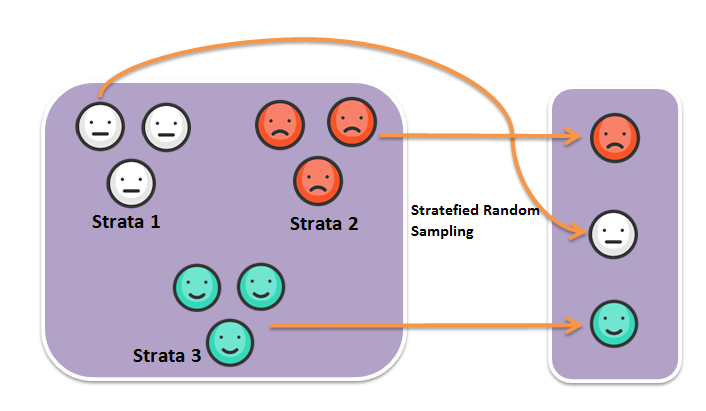

Para poder seleccionar una muestra basado en este metodo se deben seguir los siguientes pasos:
- Separar la poblacion en strata
- Determinar el tamaño de la muestra
- Seleccionar los individups aleatoriamente de cada strata

Para separar la poblacion en strata, se decidio dividir la informacion por equipo, para lo cual primero se observo la cantidad de equipos y la cantidad de datos en el dataset:

In [29]:
print(nba_dataset.TEAM_ABBREVIATION.unique(),'\n',nba_dataset.TEAM_ABBREVIATION.value_counts())

['WAS' 'CHA' 'IND' 'DET' 'BOS' 'ATL' 'CLE' 'BKN' 'NOP' 'MIA' 'ORL' 'NYK'
 'LAL' 'MIL' 'SAC' 'MIN' 'HOU' 'OKC' 'DAL' 'PHX' 'CHI' 'POR' 'GSW' 'PHI'
 'UTA' 'SAS' 'LAC' 'DEN' 'MEM' 'TOR' 'NOH' 'NJN' 'SEA' 'NOK'] 
 MIA    22452
SAS    22239
BOS    22078
LAL    21890
DAL    21470
CLE    21240
IND    21223
DEN    21134
DET    21103
GSW    21080
ATL    20981
UTA    20967
HOU    20949
LAC    20934
MIL    20923
TOR    20895
POR    20733
PHX    20728
MEM    20692
ORL    20553
WAS    20548
CHI    20489
PHI    20384
SAC    19936
NYK    19858
MIN    19773
CHA    19046
OKC    15673
BKN    10774
NJN     9765
NOP     9481
NOH     8669
SEA     5314
NOK     2137
Name: TEAM_ABBREVIATION, dtype: int64


In [30]:
games = nba_dataset.TEAM_ABBREVIATION.unique()
len(games) #shows the number of games

34

Ahora, para calcular el numero de individuos a tomar de cada juego, se realizo el calculo dividiendo la cantidad de juengos entre el tamaño de la muestra calculado anteriormente.

Ahora, se genera el siguiente codigo para calcular la muestra estratificada por partido.

In [31]:
# Stratified Sample
stratified_sample = nba_dataset.groupby('TEAM_ABBREVIATION', group_keys=False).apply(lambda x: x.sample(frac=0.6))
stratified_sample

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,MIN,FGM,FGA,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
34759,22000290,1610612737,ATL,Atlanta,1629027,Trae Young,G,33:41,10.0,18.0,...,1.0,2.0,3.0,5.0,0.0,0.0,2.0,4.0,41.0,12.0
388594,21800609,1610612737,ATL,Atlanta,1628989,Kevin Huerter,G,36:43,6.0,15.0,...,2.0,8.0,10.0,3.0,0.0,0.0,2.0,2.0,14.0,-11.0
544314,21400215,1610612737,ATL,Atlanta,203488,Mike Muscala,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
387916,21800640,1610612737,ATL,Atlanta,1627752,Taurean Prince,NaN,11:07,3.0,6.0,...,2.0,3.0,5.0,0.0,0.0,0.0,1.0,1.0,7.0,-2.0
370808,11900015,1610612737,ATL,Atlanta,203459,Allen Crabbe,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106343,20700991,1610612764,WAS,Washington,2240,Gilbert Arenas,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
463494,21600476,1610612764,WAS,Washington,203504,Trey Burke,NaN,10:48,0.0,5.0,...,1.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0
157335,20600265,1610612764,WAS,Washington,2406,Caron Butler,F,33:19,5.0,13.0,...,2.0,2.0,4.0,3.0,2.0,0.0,0.0,4.0,10.0,16.0
566036,21300826,1610612764,WAS,Washington,202066,Garrett Temple,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
stratified_sample.describe()

,GAME_ID,TEAM_ID,PLAYER_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
count,3.756660e+05,3.756660e+05,3.756660e+05,375666.000000,375666.000000,375666.000000,375666.000000,375666.000000,375666.000000,375666.000000,...,375666.000000,375666.000000,375666.000000,375666.000000,375666.000000,375666.000000,375666.000000,375666.000000,375666.000000,375666.000000
mean,2.164558e+07,1.610613e+09,3.377652e+05,2.990798,6.593189,0.347704,0.629048,1.766963,0.164796,1.455152,...,0.862197,2.531126,3.393323,1.749283,0.604606,0.387884,1.108117,1.680655,8.065787,-0.005973
std,5.652148e+06,8.649629e+00,6.429494e+06,3.062585,5.940163,0.276716,1.138364,2.435183,0.274345,2.250161,...,1.341928,2.698198,3.526827,2.388086,0.929575,0.812455,1.372146,1.562281,8.178454,9.486401
min,1.030000e+07,1.610613e+09,1.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-57.000000
25%,2.060093e+07,1.610613e+09,2.419000e+03,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000
50%,2.120021e+07,1.610613e+09,2.011440e+05,2.000000,6.000000,0.375000,0.000000,1.000000,0.000000,0.000000,...,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000,6.000000,0.000000
75%,2.170020e+07,1.610613e+09,2.030920e+05,5.000000,10.000000,0.522000,1.000000,3.000000,0.333000,2.000000,...,1.000000,4.000000,5.000000,3.000000,1.000000,1.000000,2.000000,3.000000,13.000000,4.000000
max,5.200021e+07,1.610613e+09,1.962938e+09,28.000000,50.000000,1.000000,14.000000,24.000000,1.000000,26.000000,...,16.000000,23.000000,30.000000,25.000000,10.000000,12.000000,12.000000,15.000000,81.000000,57.000000


In [33]:
strat_points_mean = round(stratified_sample['PTS'].mean(),2)
print('De la muestra de jugadores seleccionada se puede observar que la media de puntos anotados es de:', strat_points_mean)

De la muestra de jugadores seleccionada se puede observar que la media de puntos anotados es de: 8.07


In [34]:
top_scored = stratified_sample.loc[stratified_sample['PTS']>0].groupby(['TEAM_ABBREVIATION']).size().sort_values(ascending=False).head(5)
print("Los equipos con mayores puntajes son:") 
top_scored

Los equipos con mayores puntajes son:


TEAM_ABBREVIATION
SAS    10472
BOS     9817
LAL     9635
DAL     9618
GSW     9518
dtype: int64

Si volvemos a analizar la cantidad de individuos en la muestra por equipos, vemos la estratificacion generada:

In [35]:
print(stratified_sample.TEAM_ABBREVIATION.unique(),'\n\n',stratified_sample.TEAM_ABBREVIATION.value_counts())

['ATL' 'BKN' 'BOS' 'CHA' 'CHI' 'CLE' 'DAL' 'DEN' 'DET' 'GSW' 'HOU' 'IND'
 'LAC' 'LAL' 'MEM' 'MIA' 'MIL' 'MIN' 'NJN' 'NOH' 'NOK' 'NOP' 'NYK' 'OKC'
 'ORL' 'PHI' 'PHX' 'POR' 'SAC' 'SAS' 'SEA' 'TOR' 'UTA' 'WAS'] 

 MIA    13471
SAS    13343
BOS    13247
LAL    13134
DAL    12882
CLE    12744
IND    12734
DEN    12680
DET    12662
GSW    12648
ATL    12589
UTA    12580
HOU    12569
LAC    12560
MIL    12554
TOR    12537
POR    12440
PHX    12437
MEM    12415
ORL    12332
WAS    12329
CHI    12293
PHI    12230
SAC    11962
NYK    11915
MIN    11864
CHA    11428
OKC     9404
BKN     6464
NJN     5859
NOP     5689
NOH     5201
SEA     3188
NOK     1282
Name: TEAM_ABBREVIATION, dtype: int64


In [77]:
# Comparison of means between population and simple random sample
print (f'Stratified sampling Mean is: {strat_points_mean}\n Initial population mean is: {population_points_mean}\n')

# Relative Error
relative_error_mean_strat = round((abs((strat_points_mean-population_points_mean))/population_points_mean)*100, 3)
print(f'Relative error of the averages is: {relative_error_mean_strat}%')

Stratified sampling Mean is: 8.07
 Initial population mean is: 8.06

Relative error of the averages is: 0.124%


### SMOTE (Synthetic Minority Oversampling Technique)
Es una técnica de Oversampling que nos permite generar muestras sintéticas para incluir categorías minoritarias. 
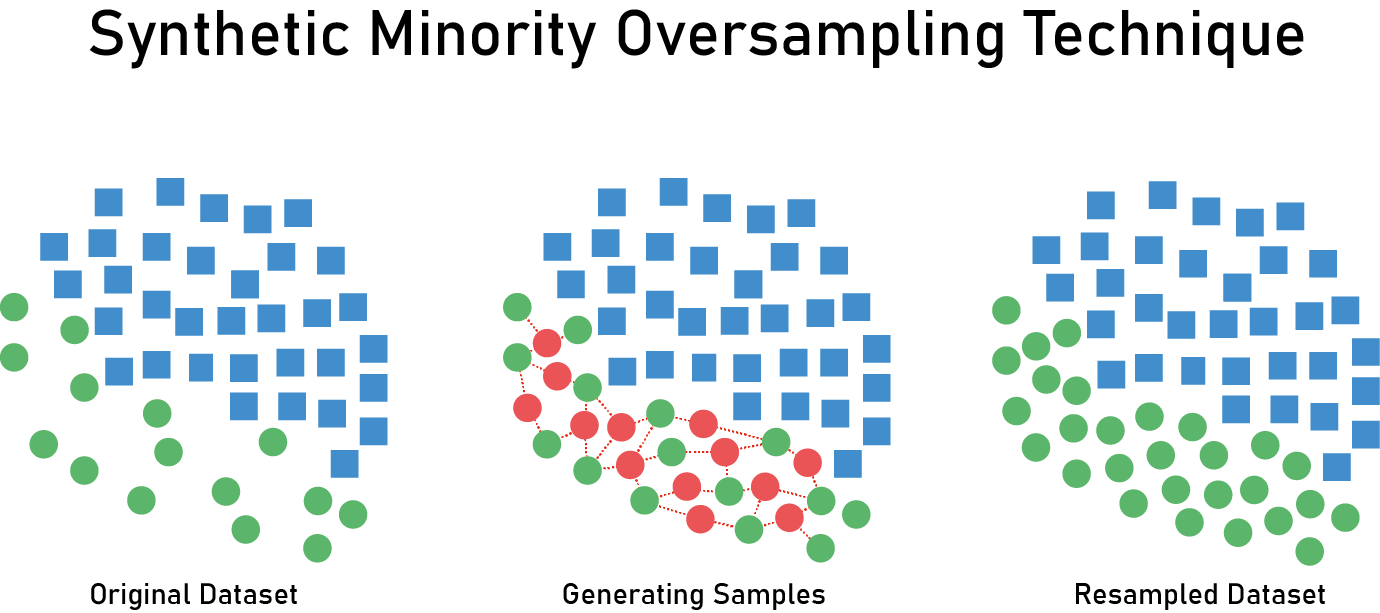

In [37]:
nba_dataset.TEAM_CITY.value_counts()

Los Angeles                  35326
Miami                        22452
San Antonio                  22239
Boston                       22078
Dallas                       21470
Cleveland                    21240
Indiana                      21223
Denver                       21134
Detroit                      21103
Golden State                 21080
Atlanta                      20981
Utah                         20967
Houston                      20949
Milwaukee                    20923
Toronto                      20895
Portland                     20733
Phoenix                      20728
Memphis                      20692
Orlando                      20553
Washington                   20548
Chicago                      20489
Philadelphia                 20384
Sacramento                   19936
New York                     19858
Minnesota                    19773
Charlotte                    19046
New Orleans                  18317
Oklahoma City                15673
Brooklyn            

In [52]:
nba_smote = nba_dataset.drop(columns=['GAME_ID','TEAM_ID','TEAM_ABBREVIATION', 'PLAYER_ID', 'PLAYER_NAME','MIN','START_POSITION'])

In [53]:
smote_dict=nba_smote.TEAM_CITY.value_counts().to_dict()
keys = {0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32}
nba_dict = dict(zip(smote_dict,keys))
nba_dict

{'Los Angeles': 0,
 'Miami': 1,
 'San Antonio': 2,
 'Boston': 3,
 'Dallas': 4,
 'Cleveland': 5,
 'Indiana': 6,
 'Denver': 7,
 'Detroit': 8,
 'Golden State': 9,
 'Atlanta': 10,
 'Utah': 11,
 'Houston': 12,
 'Milwaukee': 13,
 'Toronto': 14,
 'Portland': 15,
 'Phoenix': 16,
 'Memphis': 17,
 'Orlando': 18,
 'Washington': 19,
 'Chicago': 20,
 'Philadelphia': 21,
 'Sacramento': 22,
 'New York': 23,
 'Minnesota': 24,
 'Charlotte': 25,
 'New Orleans': 26,
 'Oklahoma City': 27,
 'Brooklyn': 28,
 'New Jersey': 29,
 'LA': 30,
 'Seattle': 31,
 'New Orleans/Oklahoma City': 32}

In [54]:
nba_smote['TEAM_CITY'] = nba_smote['TEAM_CITY'].map(nba_dict).fillna(nba_smote['TEAM_CITY'])
nba_smote.head()

,TEAM_CITY,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,19,1.0,6.0,0.167,0.0,5.0,0.000,1.0,1.0,1.0,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
1,19,2.0,12.0,0.167,1.0,8.0,0.125,0.0,0.0,0.0,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0
2,19,9.0,12.0,0.750,0.0,0.0,0.000,2.0,5.0,0.4,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0
3,19,9.0,20.0,0.450,5.0,11.0,0.455,1.0,1.0,1.0,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0
4,19,0.0,5.0,0.000,0.0,4.0,0.000,0.0,0.0,0.0,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0


In [57]:
# SMOTE sampling strategy
smote = SMOTE(sampling_strategy='not majority', k_neighbors=5)
smote_nba, smote_city = smote.fit_resample(nba_smote, nba_smote[['TEAM_CITY']] )

smote_nba.head()

,TEAM_CITY,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,19,1.0,6.0,0.167,0.0,5.0,0.000,1.0,1.0,1.0,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
1,19,2.0,12.0,0.167,1.0,8.0,0.125,0.0,0.0,0.0,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0
2,19,9.0,12.0,0.750,0.0,0.0,0.000,2.0,5.0,0.4,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0
3,19,9.0,20.0,0.450,5.0,11.0,0.455,1.0,1.0,1.0,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0
4,19,0.0,5.0,0.000,0.0,4.0,0.000,0.0,0.0,0.0,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0


In [58]:
#check the values per city
smote_nba.TEAM_CITY.value_counts()

0     35326
17    35326
31    35326
30    35326
29    35326
28    35326
27    35326
26    35326
25    35326
24    35326
23    35326
22    35326
21    35326
20    35326
19    35326
18    35326
16    35326
1     35326
15    35326
14    35326
13    35326
12    35326
11    35326
10    35326
9     35326
8     35326
7     35326
6     35326
5     35326
4     35326
3     35326
2     35326
32    35326
Name: TEAM_CITY, dtype: int64

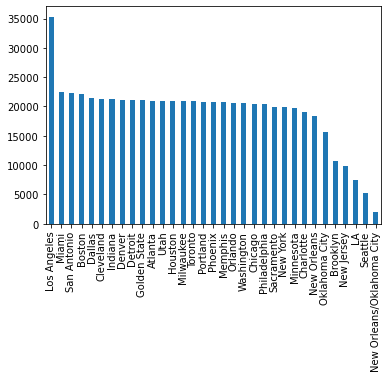

In [59]:
fig_srs = nba_dataset['TEAM_CITY'].value_counts().plot(kind='bar') #original data

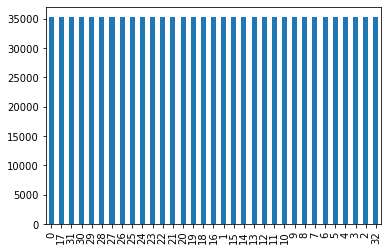

In [60]:
fig_smote = smote_city['TEAM_CITY'].value_counts().plot(kind='bar') #SMOTE data

In [61]:
print("Team results in %","\n",nba_dataset['TEAM_CITY'].value_counts(normalize=True) * 100)

Team results in % 
 Los Angeles                  5.642131
Miami                        3.585946
San Antonio                  3.551926
Boston                       3.526212
Dallas                       3.429104
Cleveland                    3.392370
Indiana                      3.389655
Denver                       3.375440
Detroit                      3.370489
Golden State                 3.366815
Atlanta                      3.351003
Utah                         3.348767
Houston                      3.345892
Milwaukee                    3.341740
Toronto                      3.337268
Portland                     3.311394
Phoenix                      3.310595
Memphis                      3.304845
Orlando                      3.282645
Washington                   3.281846
Chicago                      3.272423
Philadelphia                 3.255653
Sacramento                   3.184100
New York                     3.171642
Minnesota                    3.158066
Charlotte                    3

In [62]:
print("Team results in %","\n",smote_city['TEAM_CITY'].value_counts(normalize=True) * 100)

Team results in % 
 0     3.030303
17    3.030303
31    3.030303
30    3.030303
29    3.030303
28    3.030303
27    3.030303
26    3.030303
25    3.030303
24    3.030303
23    3.030303
22    3.030303
21    3.030303
20    3.030303
19    3.030303
18    3.030303
16    3.030303
1     3.030303
15    3.030303
14    3.030303
13    3.030303
12    3.030303
11    3.030303
10    3.030303
9     3.030303
8     3.030303
7     3.030303
6     3.030303
5     3.030303
4     3.030303
3     3.030303
2     3.030303
32    3.030303
Name: TEAM_CITY, dtype: float64


Al comparar el SMOTE sample con el dataset original, se puede observar que la variable 'Ciudad' en el dataset original tiene una contribucion porcentual variada al total de la poblacion, mientras que en la muestra SMOTE estos valores se han equiparado a 3.03%. 

In [65]:
smote_points_mean = round(smote_nba['PTS'].mean(),2)
print('De la muestra de jugadores seleccionada se puede observar que la media de puntos anotados es de:', smote_points_mean)

De la muestra de jugadores seleccionada se puede observar que la media de puntos anotados es de: 8.05


In [76]:
# Comparison of means between population and SMOTE sample
print (f'SMOTE sampling Mean is: {smote_points_mean} and Initial population mean is: {population_points_mean}\n')

# Relative Error
relative_error_mean_smote = round((abs((smote_points_mean-population_points_mean))/population_points_mean)*100, 3)
print(f'Relative error of the averages is: {relative_error_mean_smote}%')

SMOTE sampling Mean is: 8.05 and Initial population mean is: 8.06

Relative error of the averages is: 0.124%


## Nivel 3
- Ejercicio 3:
Continúa con el conjunto de datos de tema deportivo y genera una muestra utilizando el método Reservoir sampling.

### Reservoir sampling
Es una familia de algoritmos aleatorios que se utilizan para seleccionar *'k'* muestras aleatoria simple de una poblacion *'n'*; se utiliza cuando *n* es muy grande o desconocida.
<br>
Para realizarlo se siguen los siguientes pasos:
- Se crea un array *'reservoir'* que hara una copia del primer elemento *'k'* del *'stream'* (population en este caso) 
- Se seleccionan aleatoriamente uno a uno los elementos desde *'k+1'* hasta *'n-1'*
- Si el elemento seleccionado no se seleccionó previamente, se añadre al *'stream'* 
- Para verificar si un elemento se seleccionó previamente o no, debemos buscar el elemento en el stream
<br>
*La complejidad temporal de este algoritmo puede ser costoso si k es grande*

In [68]:
import random

In [69]:
#select the sample with the reservoir sampling method
def generator(max):
    number = 1
    while number < max:
        number += 1
        yield number

stream = generator(len(nba_dataset)) #population
k=size #tamaño de la muestra
reservoir = [] #output array

for i, element in enumerate(stream):
    if i+1<= k:
        reservoir.append(element)
    else:
        probability = k/(i+1)
        if random.random() < probability:
             reservoir[random.choice(range(0,k))] = element

In [70]:
reservoir_nba = nba_dataset.iloc[reservoir]
reservoir_nba.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,MIN,FGM,FGA,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
324875,11000089,1610612744,GSW,Golden State,200760,Rodney Carney,NaN,12,4.0,6.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,9.0,0.0
303126,21000882,1610612744,GSW,Golden State,2748,Dorell Wright,F,39:39,7.0,20.0,...,1.0,2.0,3.0,4.0,1.0,2.0,3.0,3.0,26.0,1.0
185962,20500506,1610612745,HOU,Houston,436,Juwan Howard,F,44:58,9.0,22.0,...,6.0,9.0,15.0,0.0,0.0,0.0,3.0,3.0,24.0,-5.0
589051,11300038,1610612750,MIN,Minnesota,201937,Ricky Rubio,NaN,28,0.0,7.0,...,0.0,5.0,5.0,6.0,4.0,1.0,1.0,3.0,3.0,0.0
613838,21200378,1610612748,MIA,Miami,202708,Norris Cole,NaN,23:08,3.0,6.0,...,0.0,2.0,2.0,1.0,0.0,0.0,3.0,3.0,6.0,-18.0


In [73]:
reservoir_nba.describe().round(2)

,GAME_ID,TEAM_ID,PLAYER_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
count,400.00,4.000000e+02,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,...,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,21995048.56,1.610613e+09,317215.78,2.98,6.66,0.34,0.60,1.70,0.14,1.43,...,0.97,2.65,3.62,1.77,0.62,0.34,1.11,1.82,8.00,-0.63
std,5776192.00,8.730000e+00,531852.68,3.08,5.92,0.27,1.13,2.49,0.25,2.19,...,1.51,2.76,3.68,2.44,1.00,0.73,1.39,1.62,8.18,9.90
min,10500018.00,1.610613e+09,87.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-34.00
25%,20601091.75,1.610613e+09,2447.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-6.00
50%,21201067.50,1.610613e+09,201160.50,2.00,6.00,0.38,0.00,0.00,0.00,0.00,...,0.00,2.00,3.00,1.00,0.00,0.00,1.00,1.50,5.00,0.00
75%,21700613.75,1.610613e+09,203091.75,5.00,10.00,0.50,1.00,3.00,0.25,2.00,...,1.00,4.00,6.00,3.00,1.00,0.00,2.00,3.00,14.00,4.00
max,42000204.00,1.610613e+09,1630547.00,14.00,24.00,1.00,7.00,14.00,1.00,12.00,...,9.00,14.00,20.00,16.00,6.00,4.00,8.00,6.00,41.00,34.00


In [74]:
reservoir_pts_mean = round(reservoir_nba['PTS'].mean(),2)
print('De la muestra de jugadores seleccionada se puede observar que la media de puntos anotados es de:', reservoir_pts_mean)

De la muestra de jugadores seleccionada se puede observar que la media de puntos anotados es de: 8.0


In [75]:
# Comparison of means between population and SMOTE sample
print (f'Reservoir sampling Mean is: {reservoir_pts_mean} and Initial population mean is: {population_points_mean}\n')

# Relative Error
relative_error_mean_res = round((abs((reservoir_pts_mean-population_points_mean))/population_points_mean)*100, 3)
print(f'Relative error of the averages is: {relative_error_mean_res}%')

Reservoir sampling Mean is: 8.0 and Initial population mean is: 8.06

Relative error of the averages is: 0.744%


### Relative error comparison

In [97]:
errors_comp=[['Simple Random',relative_error_mean_srs],['Systematic', relative_error_mean_sys],['Stratified',relative_error_mean_strat],['SMOTE',relative_error_mean_smote],['Reservoir',relative_error_mean_res]]
errors_comp_df=pd.DataFrame(errors_comp, columns = ['Sampling method','Relative error'])
errors_comp_df

,Sampling method,Relative error
0,Simple Random,1.241
1,Systematic,5.087
2,Stratified,0.124
3,SMOTE,0.124
4,Reservoir,0.744


<AxesSubplot:xlabel='Sampling method', ylabel='Relative error'>

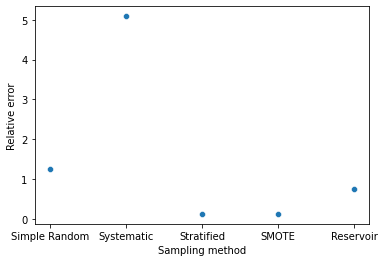

In [98]:
sns.scatterplot(x='Sampling method', y='Relative error', data=errors_comp_df)

Se puede observar de los metodos de muestreo que la que tiene el mayor margen de error relativo es systematic sampling, seguido por reservoir sampling.

In [102]:
means_comparison = pd.DataFrame([['Population',population_points_mean],['Symple random sample',srs_points_mean],['Systematic sample',sys_points_mean],['Stratified sample',strat_points_mean],['SMOTE sample', smote_points_mean],['Reservoir sample',reservoir_pts_mean]],columns = ['Sampling method','Mean value'])
means_comparison

,Sampling method,Mean value
0,Population,8.06
1,Symple random sample,7.96
2,Systematic sample,7.65
3,Stratified sample,8.07
4,SMOTE sample,8.05
5,Reservoir sample,8.00


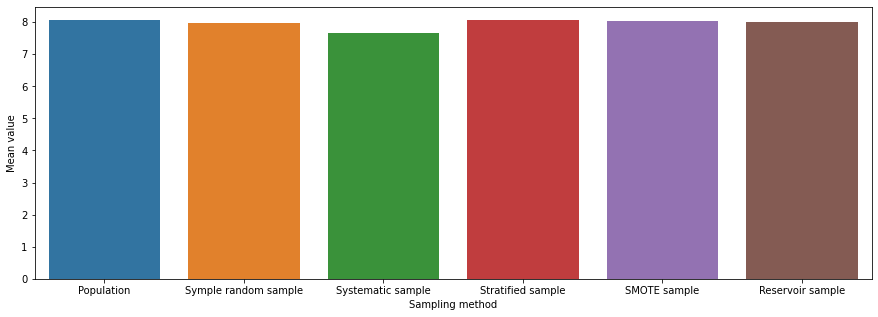

In [114]:
fig, ax1 = plt.subplots(figsize=(15,5))
means_plot=sns.barplot(x='Sampling method', y='Mean value', data=means_comparison)

Al comparar las medias de los puntos anotados en las diferentes muestras, se observa que la diferencia con la media de la poblacion total de datos es mayor en los metodos systematic sample y reservoir, como se observo anteriormente al analizar el error relativo.

### exit